#ID0309 - Aprendizaje Estadístico

### Otoño 2023

### ID0309_Lab_1-7

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

#Clasificacion con scikit-learn





[Scikit-Learn](https://scikit-learn.org/stable/) es una de estas librerías gratuitas para Python.

Cuenta con algoritmos de:
* clasificación,
* regresión,
* clustering, y
* reducción de dimensionalidad.

La base de datos [MNIST](https://es.wikipedia.org/wiki/Base_de_datos_MNIST), base de datos del Instituto Nacional Modificado de Estándares y Tecnología, es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes.

* La base de datos también se utiliza ampliamente para formación y pruebas en el campo del aprendizaje automático.

* Fue creado "volviendo a mezclar" las muestras de los conjuntos de datos originales del NIST.

* Los creadores sintieron que, dado que el conjunto de datos de capacitación del NIST se tomó de empleados de la Oficina del Censo estadounidense, mientras que el conjunto de datos de prueba se tomó de estudiantes de secundaria estadounidenses, no era adecuado para experimentos de aprendizaje automático.

* Además, las imágenes en blanco y negro del NIST se normalizaron para que quepan en un cuadro delimitador de 28x28 píxeles y se suavizaron, lo que introdujo niveles de escala de grises.

* La base de datos MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba.

* La mitad del conjunto de entrenamiento y la mitad del conjunto de prueba se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de prueba se tomaron del conjunto de datos de prueba del NIST.

* Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella.


**Nota: El código esta dividido en los pasos necesarios.**

##Paso 1: Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##Paso 2a: Obtener los datos

In [ ]:
# obtiene dataset que ya trae la librería
x, y = load_digits(return_X_y=True)

In [ ]:
# imprime los datos de "x"
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
# imprime los datos de "y"
print(y)

[0 1 2 ... 8 9 8]


##Paso 2b: Divide los datos

In [ ]:
# Divide los datos en subconjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# aquí se notan las divisiones
print(len(y))
print(len(y_train))
print(len(y_test))

1797
1437
360


##Paso 2c: Escalamiento de datos

In [ ]:
# librería para escalar los datos
escalador = StandardScaler()
x_train = escalador.fit_transform(x_train)

In [ ]:
# muestra los datos
print(x[0])
print()
print(x_train[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

[ 0.         -0.33790435 -1.09141592 -0.64913206  0.73480922 -0.6782652
 -0.40764783 -0.12238102 -0.05576317 -0.62606288 -0.99058772  0.99749054
  0.13213489 -1.19579353 -0.51556231 -0.12605859 -0.03733267 -0.72296123
  0.55610538  1.38118964 -0.98465664 -1.26284019 -0.55465252 -0.11565628
 -0.02638899 -0.15208278  1.10759523  0.37163491 -1.60830723 -1.28974179
 -0.63555933 -0.04573894  0.         -0.10276083  1.32734049  0.31000002
 -1.05452978 -0.80512633 -0.83498919  0.         -0.05806465  0.13008703
  1.23225418  1.35913603  1.32341669  1.01539823  1.51779287  3.19368333
 -0.03963009 -0.40398151  0.25100815  1.22276113 -0.47996928 -0.96182318
  2.3466476   6.15487177 -0.02638899 -0.30140625 -1.0865776  -1.14418634
  0.65337

##Paso 3: Crea un módelo

In [ ]:
# módelo de regresión logistica
modelito = LogisticRegression(solver='liblinear',
                           C=0.05, multi_class='ovr',
                           random_state=0)

In [ ]:
# entrenamiento de módelo
modelito.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

##Paso 4: Evalua el módelo

In [ ]:
# primero escala los datos de prueba
x_test = escalador.transform(x_test)

In [ ]:
# se evalua el módelo con los datos de prueba
y_pred = modelito.predict(x_test)

In [ ]:
# muestra las predicciones del módelo
# que son las clases a las que el módelo
# predice (estima) que corresponde cada dato.
print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 9 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 0 1 5 2 5 3 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 3 7 2 7 8 5 5 7 5 3 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 1 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 8 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [ ]:
# muestra la calidad del módelo con datos de entrenamiento
print(modelito.score(x_train, y_train))
# muestra la calidad del módelo con datos de prueba
print(modelito.score(x_test, y_test))

0.964509394572025
0.9416666666666667


In [ ]:
# obtiene la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]


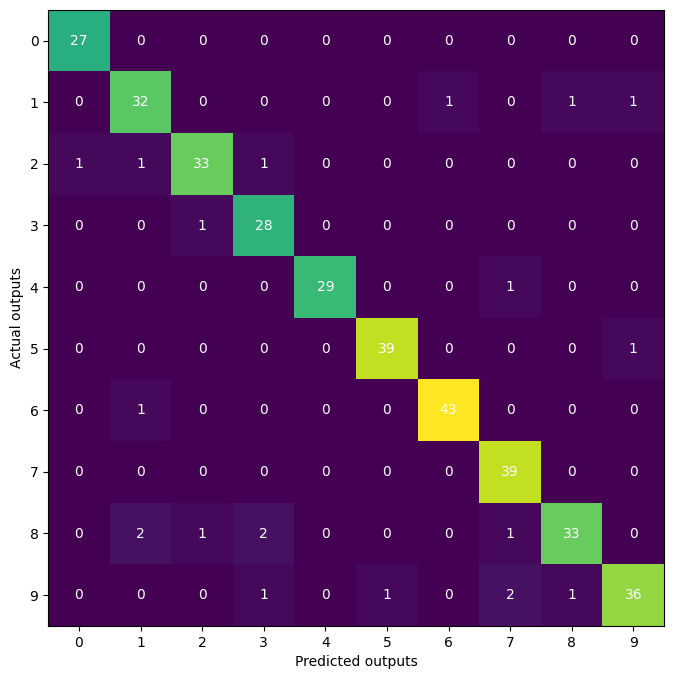

In [ ]:
# muestra la matriz de confusión
# en una figura con colores
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center',
                va='center', color='white')
plt.show()


In [ ]:
# genera reporte del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## Probando otro modélo

In [ ]:
# máquina de vectores de soporte
# (support vector machine - SVM)
from sklearn import svm
modelote = svm.SVC()
modelote.fit(x_train, y_train)

SVC()

In [ ]:
# prueba SVM
y_pred2 = modelote.predict(x_test)

In [ ]:
print(y_pred2)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 7 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 4 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 4 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 2 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 4 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 28  1  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  0  1  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  1  0 40]]


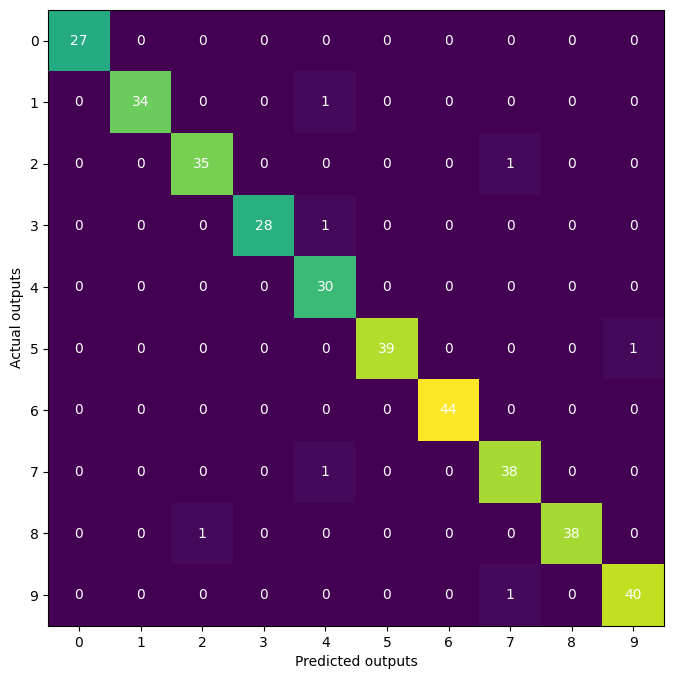

In [ ]:
# obtiene la matriz de confusión
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

# muestra la matriz de confusión
# en una figura con colores
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm2[i, j], ha='center',
                va='center', color='white')
plt.show()

In [ ]:
# genera reporte del modelo
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       0.97      0.97      0.97        36
           3       1.00      0.97      0.98        29
           4       0.91      1.00      0.95        30
           5       1.00      0.97      0.99        40
           6       1.00      1.00      1.00        44
           7       0.95      0.97      0.96        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

